## Parametry

In [1]:
MODEL_NAME = "trained_model.h5"
LEARNING_RATE = 0.001

## Wczytanie modelu z pliku

In [2]:
from tensorflow.keras.models import load_model
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from script.main.loss_functions import *

model = load_model('../resources/%s' % MODEL_NAME, compile=False)
model.compile(loss=mean_square_loss_func, optimizer=RMSProp(lr=LEARNING_RATE), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 37, 128)           102400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 19)                1235      
Total params: 157,203
Trainable params: 157,203
Non-trainable params: 0
________________________________________________

## Wczytanie danych testowych z pliku

In [3]:
import numpy as np

X_test = np.load("../resources/test_data/X_test.npy")
Y_test = np.load("../resources/test_data/Y_test.npy")

## Porównanie zmienności temperatur

[1. 0. 0. 0. 0. 0.]
(37, 71)


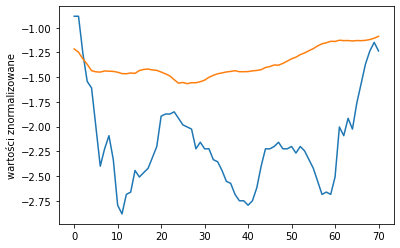

In [4]:
import matplotlib.pyplot as plt

temps = np.squeeze(X_test[0:1,:,:])
month = temps[31:37,1]
print(month)
for i in range(71):
    ii = i % 24
    predicted = model.predict(np.array([temps,]))
    final_pred = predicted[0,:]
    final_pred = np.append(final_pred, int(ii==0 or ii==1))
    final_pred = np.append(final_pred, int(ii==2 or ii==3))
    final_pred = np.append(final_pred, int(ii==4 or ii==5))
    final_pred = np.append(final_pred, int(ii==6 or ii==7))
    final_pred = np.append(final_pred, int(ii==8 or ii==9))
    final_pred = np.append(final_pred, int(ii==10 or ii==11))
    final_pred = np.append(final_pred, int(ii==12 or ii==13))
    final_pred = np.append(final_pred, int(ii==14 or ii==15))
    final_pred = np.append(final_pred, int(ii==16 or ii==17))
    final_pred = np.append(final_pred, int(ii==18 or ii==19))
    final_pred = np.append(final_pred, int(ii==20 or ii==21))
    final_pred = np.append(final_pred, int(ii==22 or ii==23))
    final_pred = np.append(final_pred, month)
    
    temps = np.append(temps, np.array([final_pred,]).transpose(), axis=1)
    temps = temps[:,1:]

print(temps.shape)
plt.plot(range(0,71),np.squeeze(X_test[0:1:,1:2,:]))

plt.plot(range(0,71), np.squeeze(temps[1:2,:]))

plt.ylabel('wartości znormalizowane')
plt.show()